In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv("Salary_Prediction_cleaned.csv")
df.head()

,Unnamed: 0,job title,job description,rating,company name,headquarters,size,founded,ownership,sector,...,headquarters same city,python involved,aws involved,excel involved,tableau involved,powerBI involved,description length,seniority,job simplification,no of competitors
0,0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,Montreal,501 to 1000 employees,2007,Company - Private,Travel & Tourism,...,no,no,no,no,yes,yes,3417,senior,data scientist,No data
1,1,Data Scientist,"At Noom, we use scientifically proven methods ...",4.5,Noom US,New York,1001 to 5000 employees,2008,Company - Private,Consumer Services,...,yes,yes,no,yes,no,no,2350,none,data scientist,No data
2,2,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,Lyndhurst,201 to 500 employees,2019,Company - Private,Information Technology,...,yes,yes,no,yes,yes,yes,2619,none,none,2
3,3,Director,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,New York,51 to 200 employees,2007,Company - Private,Business Services,...,yes,yes,no,yes,no,no,2755,none,director,3
4,4,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies,Hartford,201 to 500 employees,1985,Company - Private,Insurance,...,no,yes,no,no,no,no,2692,none,data scientist,3


## Components under Analysis
1) Describe
2) Histogram
3) Boxplot
4) Correlation Analysis
5) Bar Graphs
6) Pivot Tables
7) Word Cloud

### To understand the numeric data (continuous variables) trend we can use describe 

In [82]:
df.describe()

,Unnamed: 0,rating,founded,min salary,max salary,avg salary,age,description length
count,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000
mean,1445.500000,3.744537,1972.248617,83.255878,135.300830,109.278354,49.751383,3787.234786
std,834.992814,0.730377,52.936588,34.752784,45.347508,39.043865,52.936588,2003.230826
min,0.000000,-1.000000,1625.000000,10.000000,26.000000,18.000000,2.000000,42.000000
25%,722.750000,3.400000,1961.000000,54.000000,98.000000,75.000000,16.000000,2359.250000
50%,1445.500000,3.800000,1996.000000,82.000000,136.000000,107.000000,26.000000,3507.500000
75%,2168.250000,4.100000,2006.000000,111.000000,166.000000,133.000000,61.000000,4869.250000
max,2891.000000,5.000000,2020.000000,200.000000,254.000000,225.000000,397.000000,19895.000000


### To understand the frequency distribution we will use Histograms - A histogram is the best way to visualize the frequency distribution of a dataset by splitting it into small equal-sized intervals called bins.

<AxesSubplot:>

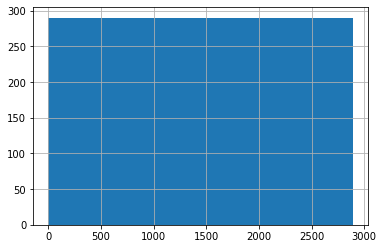

In [83]:
df['Unnamed: 0'].hist()

<AxesSubplot:>

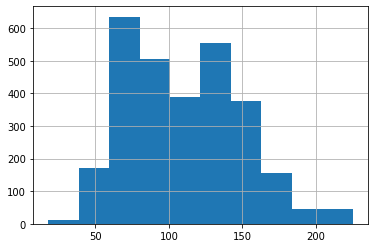

In [84]:
#Data is pretty normalized in Avg Salary
df['avg salary'].hist()

<AxesSubplot:>

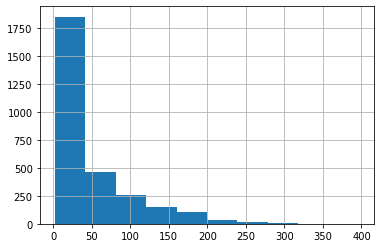

In [85]:
#But Data is not normalized in Age
df['age'].hist()

### For outlier detection we will be using Box Plot - display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.

<AxesSubplot:>

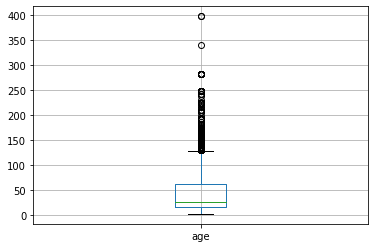

In [86]:
df.boxplot(column= 'age')

<AxesSubplot:>

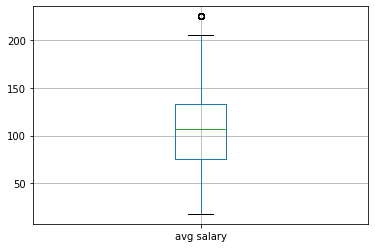

In [87]:
df.boxplot(column= 'avg salary')

<AxesSubplot:>

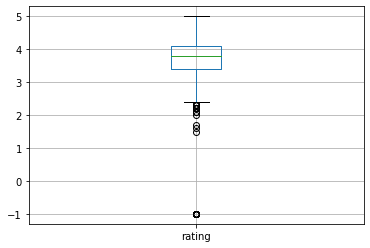

In [88]:
df.boxplot(column= 'rating')

### For Correlation Analysis for continuous variables

#### Different type of correlations
1) Positive correlation : one variable increases as the other increases or one decreases as the other decreases.
2) Negative correlation : one variable increases as the other decreases and vice versa.
3) Neutral correlation : the two variables show no relationship to one another.

#### corr() - uses Pearson’s correlation
corr(x,y) = covariance(x,y)/(standardDeviation(x)*standardDeviation(y))

#### Interpretation - but these are arbitrary limits and the context of the results should be considered.
1) 0-0.19 is regarded as very weak, 
2) 0.2-0.39 as weak, 
3) 0.40-0.59 as moderate, 
4) 0.6-0.79 as strong and 
5) 0.8-0.99 as very strong correlation
6) 1 as Perfect

In [89]:
correl = df[['rating','avg salary','age','description length']].corr()
correl

,rating,avg salary,age,description length
rating,1.000000,0.062752,-0.024163,-0.073672
avg salary,0.062752,1.000000,-0.063443,-0.003381
age,-0.024163,-0.063443,1.000000,0.397938
description length,-0.073672,-0.003381,0.397938,1.000000


<AxesSubplot:>

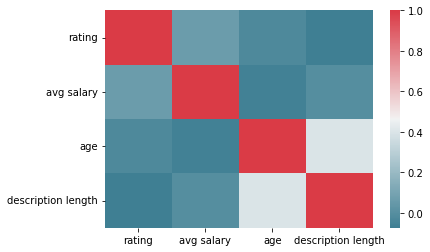

In [90]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(correl,cmap = cmap)

### To understand the categorical data trend we will use - Bar Graphs

In [91]:
df.columns

Index(['Unnamed: 0', 'job title', 'job description', 'rating', 'company name',
       'headquarters', 'size', 'founded', 'ownership', 'sector', 'revenue',
       'easy apply', 'city', 'state', 'min salary', 'max salary', 'avg salary',
       'age', 'headquarters same city', 'python involved', 'aws involved',
       'excel involved', 'tableau involved', 'powerBI involved',
       'description length', 'seniority', 'job simplification',
       'no of competitors'],
      dtype='object')

In [92]:
df_cat = df[['job title','company name','headquarters','size','ownership', 'sector','easy apply','city','state','headquarters same city','python involved',
            'aws involved','excel involved','seniority','job simplification', 'no of competitors']]

In [93]:
print(df_cat.columns)
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for "+str(i)+" with a Total of "+str(len(cat_num))+" values")
    

Index(['job title', 'company name', 'headquarters', 'size', 'ownership',
       'sector', 'easy apply', 'city', 'state', 'headquarters same city',
       'python involved', 'aws involved', 'excel involved', 'seniority',
       'job simplification', 'no of competitors'],
      dtype='object')
Graph for job title with a Total of 1078 values
Graph for company name with a Total of 1386 values
Graph for headquarters with a Total of 387 values
Graph for size with a Total of 8 values
Graph for ownership with a Total of 12 values
Graph for sector with a Total of 24 values
Graph for easy apply with a Total of 2 values
Graph for city with a Total of 160 values
Graph for state with a Total of 11 values
Graph for headquarters same city with a Total of 2 values
Graph for python involved with a Total of 2 values
Graph for aws involved with a Total of 2 values
Graph for excel involved with a Total of 2 values
Graph for seniority with a Total of 3 values
Graph for job simplification with a Total of 6 

#### Plotting Bar graphs for values < 30

<function matplotlib.pyplot.show(close=None, block=None)>

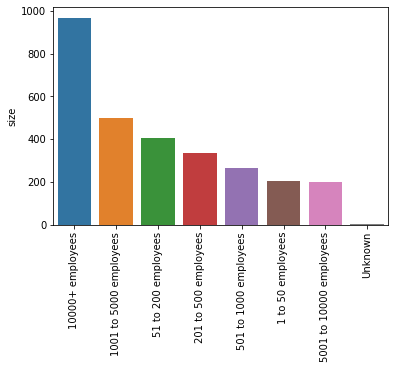

In [94]:
cat_num = df_cat['size'].value_counts()
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

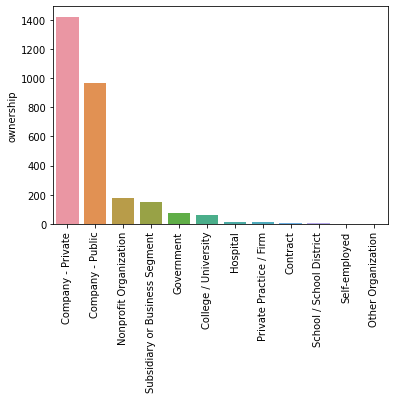

In [95]:
cat_num = df_cat['ownership'].value_counts()
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

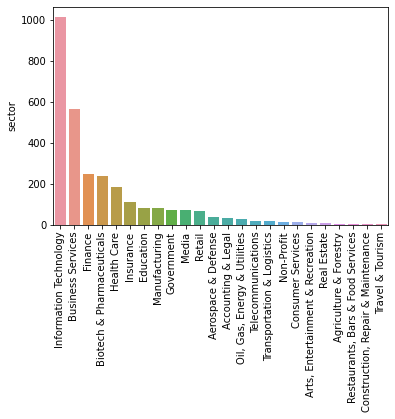

In [96]:
cat_num = df_cat['sector'].value_counts()
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

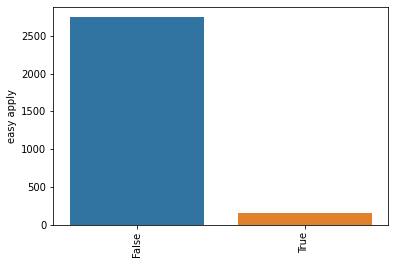

In [97]:
cat_num = df_cat['easy apply'].value_counts()
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

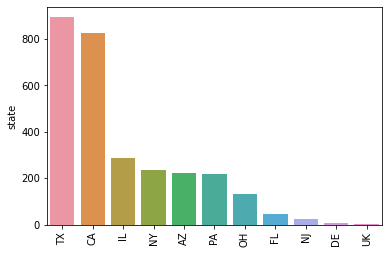

In [98]:
cat_num = df_cat['state'].value_counts()
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

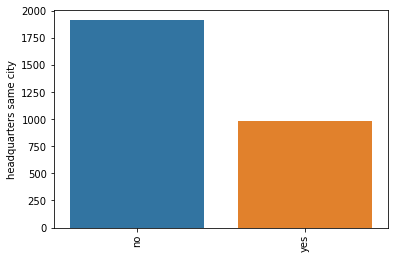

In [99]:
cat_num = df_cat['headquarters same city'].value_counts()
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

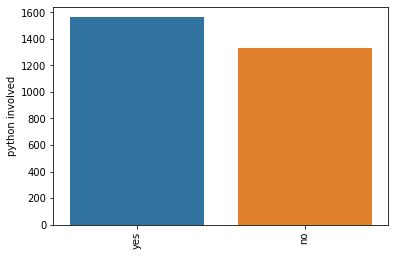

In [100]:
cat_num = df_cat['python involved'].value_counts()
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

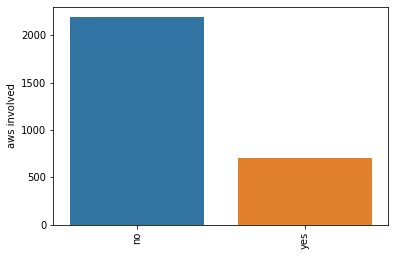

In [101]:
cat_num = df_cat['aws involved'].value_counts()
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

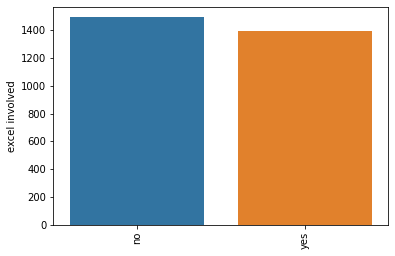

In [102]:
cat_num = df_cat['excel involved'].value_counts()
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

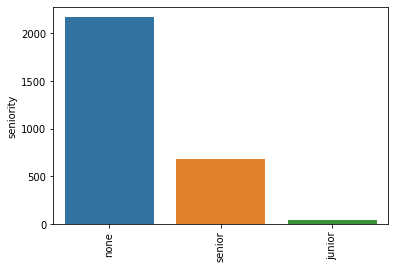

In [103]:
cat_num = df_cat['seniority'].value_counts()
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

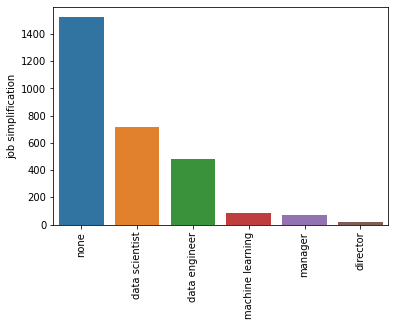

In [104]:
cat_num = df_cat['job simplification'].value_counts()
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

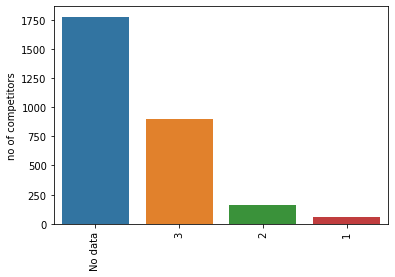

In [105]:
cat_num = df_cat['no of competitors'].value_counts()
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

#### Plotting Bar graphs for values > 30 - To make the graph clearer we will take only the greatest 30 values

<function matplotlib.pyplot.show(close=None, block=None)>

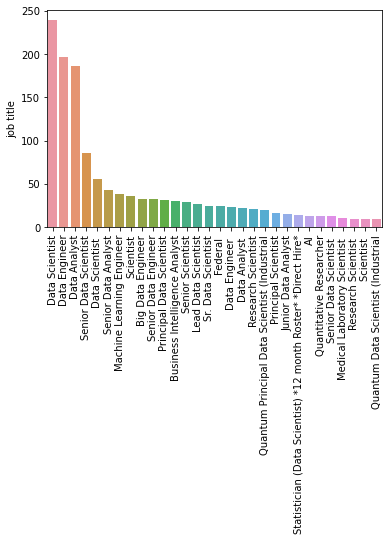

In [106]:
cat_num = df_cat['job title'].value_counts()[:30]
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

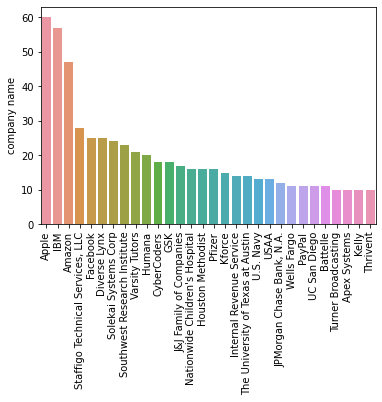

In [107]:
cat_num = df_cat['company name'].value_counts()[:30]
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

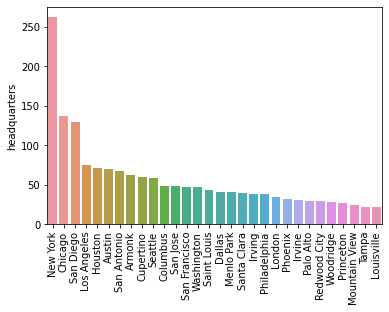

In [108]:
cat_num = df_cat['headquarters'].value_counts()[:30]
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

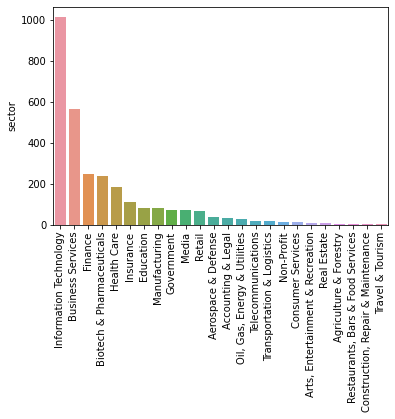

In [109]:
cat_num = df_cat['sector'].value_counts()[:30]
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

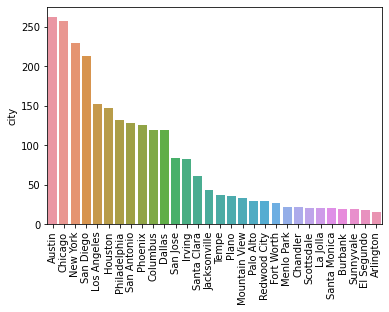

In [110]:
cat_num = df_cat['city'].value_counts()[:30]
chart = sns.barplot(x=cat_num.index,y=cat_num)
chart.set_xticklabels(cat_num.index, rotation=90)
plt.show

### Pivot Tables

In [111]:
pd.pivot_table(df, index='job simplification', values='avg salary')

,avg salary
job simplification,
data engineer,103.637214
data scientist,124.904762
director,102.928571
machine learning,125.154762
manager,112.057143
none,102.814060


In [112]:
pd.pivot_table(df, index=['job simplification','seniority'], values='avg salary')

avg salary
job simplification seniority            
data engineer      junior     102.333333
                   none       103.267760
                   senior     104.949541
data scientist     junior      98.625000
                   none       124.498876
                   senior     125.983019
director           none        99.631579
                   senior     134.250000
machine learning   none       126.787671
                   senior     114.318182
manager            none       111.717742
                   senior     114.687500
none               junior     103.160714
                   none       102.070364
                   senior     105.921329

In [113]:
pd.pivot_table(df, index=['job simplification','seniority'], values='avg salary').sort_values('avg salary', ascending= False)

avg salary
job simplification seniority            
director           senior     134.250000
machine learning   none       126.787671
data scientist     senior     125.983019
                   none       124.498876
manager            senior     114.687500
machine learning   senior     114.318182
manager            none       111.717742
none               senior     105.921329
data engineer      senior     104.949541
                   none       103.267760
none               junior     103.160714
data engineer      junior     102.333333
none               none       102.070364
director           none        99.631579
data scientist     junior      98.625000

In [114]:
pd.pivot_table(df,index='rating',values='avg salary').sort_values('avg salary', ascending= False)

,avg salary
rating,
2.0,177.500000
2.1,148.250000
2.3,144.833333
4.4,126.914062
1.5,124.000000
4.5,123.813131
4.8,120.907895
4.1,118.658436
5.0,113.216867


In [115]:
pd.pivot_table(df,index='no of competitors',values='avg salary').sort_values('avg salary', ascending= False)

,avg salary
no of competitors,
1,121.642857
3,113.288333
2,107.135220
No data,107.049522


In [116]:
pd.pivot_table(df,index='python involved',values='avg salary').sort_values('avg salary', ascending= False)

,avg salary
python involved,
yes,114.871959
no,102.709023


In [117]:
pd.pivot_table(df,index='excel involved',values='avg salary').sort_values('avg salary', ascending= False)

,avg salary
excel involved,
no,109.873074
yes,108.643674


In [118]:
pd.pivot_table(df,index='aws involved',values='avg salary').sort_values('avg salary', ascending= False)

,avg salary
aws involved,
no,110.040695
yes,106.913475


In [119]:
pd.pivot_table(df,index='tableau involved',values='avg salary').sort_values('avg salary', ascending= False)

,avg salary
tableau involved,
no,110.168498
yes,106.532486


In [120]:
pd.pivot_table(df,index='powerBI involved',values='avg salary').sort_values('avg salary', ascending= False)

,avg salary
powerBI involved,
no,110.625835
yes,102.769153


In [121]:
pd.pivot_table(df,index='seniority',values='avg salary').sort_values('avg salary', ascending= False)

,avg salary
seniority,
senior,113.894273
none,107.949379
junior,102.552632


In [122]:
pd.pivot_table(df, index=['state','job simplification'], values='avg salary')

avg salary
state job simplification            
AZ    data engineer        93.016129
      data scientist      114.569444
      director            116.000000
      machine learning     86.833333
      manager              82.071429
      none                 97.153509
CA    data engineer       129.470874
      data scientist      150.045259
      director            118.833333
      machine learning    151.083333
      manager             135.600000
      none                127.083726
DE    data engineer       100.250000
      data scientist      143.250000
      none                173.000000
FL    data engineer        80.300000
      data scientist       77.500000
      manager              71.000000
      none                 77.458333
IL    data engineer        91.566667
      data scientist       87.318182
      director             96.000000
      machine learning     90.000000
      manager              69.642857
      none                 78.583333
NJ    data engineer        78.000000
      data scientist      130.000000
      machine learning    107.500000
      none                111.214286
NY    data engineer       129.433333
      data scientist      131.784247
      director            135.250000
      machine learning    131.357143
      manager             124.500000
      none                139.717742
OH    data engineer        79.173913
      data scientist      121.189655
      director             62.500000
      machine learning     96.166667
      manager             107.666667
      none                 90.457746
PA    data engineer       103.016667
      data scientist       93.058824
      director             85.833333
      machine learning     92.000000
      manager             110.000000
      none                 96.061224
TX    data engineer        97.915385
      data scientist      108.550000
      director             86.800000
      machine learning    109.727273
      manager             109.261905
      none                 91.005882
UK    data scientist       68.500000
      none                110.000000

aggfunc= 'count' Gives count of the number of fields with the specific attribute

In [123]:
pd.pivot_table(df, index=['state','job simplification'],values='avg salary',aggfunc= 'count')

avg salary
state job simplification            
AZ    data engineer               62
      data scientist              36
      director                     2
      machine learning             3
      manager                      7
      none                       114
CA    data engineer              103
      data scientist             232
      director                     6
      machine learning            36
      manager                     25
      none                       424
DE    data engineer                2
      data scientist               2
      none                         4
FL    data engineer                5
      data scientist               3
      manager                      1
      none                        36
IL    data engineer               45
      data scientist              77
      director                     2
      machine learning            10
      manager                      7
      none                       144
NJ    data engineer                1
      data scientist              14
      machine learning             1
      none                         7
NY    data engineer               15
      data scientist             146
      director                     2
      machine learning             7
      manager                      3
      none                        62
OH    data engineer               23
      data scientist              29
      director                     1
      machine learning             3
      manager                      3
      none                        71
PA    data engineer               30
      data scientist              34
      director                     3
      machine learning             2
      manager                      3
      none                       147
TX    data engineer              195
      data scientist             140
      director                     5
      machine learning            22
      manager                     21
      none                       510
UK    data scientist               1
      none                         3

In [124]:
pd.pivot_table(df, index=['state'], values='avg salary').sort_values('avg salary', ascending= False)

,avg salary
state,
DE,147.375000
CA,135.074455
NY,133.651064
NJ,121.043478
UK,99.625000
AZ,98.366071
PA,96.561644
TX,96.132139
OH,95.630769


In [125]:
#Table of all data scientist jobs
pd.pivot_table(df[df['job simplification']=='data scientist'], index= 'state',values='avg salary').sort_values('avg salary', ascending= False)

,avg salary
state,
CA,150.045259
DE,143.250000
NY,131.784247
NJ,130.000000
OH,121.189655
AZ,114.569444
TX,108.550000
PA,93.058824
IL,87.318182


In [126]:
pd.pivot_table(df,index='revenue',columns='python involved', values='avg salary', aggfunc='count')

python involved,no,yes
revenue,,
$1 to $2 billion (USD),98,80
$1 to $5 million (USD),30,41
$10 to $25 million (USD),67,80
$10+ billion (USD),217,370
$100 to $500 million (USD),142,172
$2 to $5 billion (USD),126,75
$25 to $50 million (USD),46,71
$5 to $10 billion (USD),59,72
$5 to $10 million (USD),29,23


### Word Cloud

In [127]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# if it is the first time executing, execute the following code
# nltk.download('stopwords') 
# nltk.download('punkt')

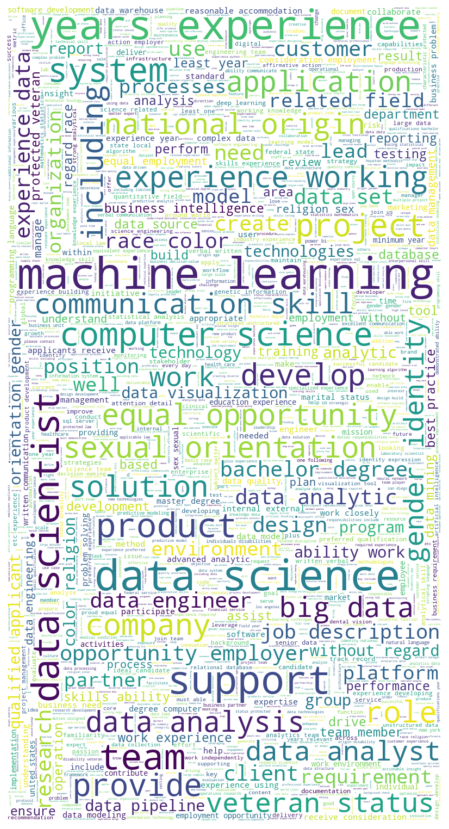

In [132]:
words = " ".join(df['job description'])
set(stopwords.words('english'))

#Remove the punctuation and Stop words
def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

filtered_words = punctuation_stop(words)

text = " ".join([ele for ele in filtered_words])

wc = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[15,15])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()
